In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Drought_dataset_Chuadanga.csv")
df.head(10)

,Station,Year,Month,Temperature,Rainfall
0,Chuadanga,1994,1,18.80,9.00
1,Chuadanga,1994,2,24.80,15.44
2,Chuadanga,1994,3,28.90,35.33
3,Chuadanga,1994,4,32.90,47.11
4,Chuadanga,1994,5,34.70,119.11
5,Chuadanga,1994,6,31.00,225.78
6,Chuadanga,1994,7,30.25,366.89
7,Chuadanga,1994,8,30.80,209.56
8,Chuadanga,1994,9,30.25,321.44
9,Chuadanga,1994,10,29.30,186.67


In [3]:
df.drop(df[(df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [4]:
df.size

945

<Axes: xlabel='Year'>

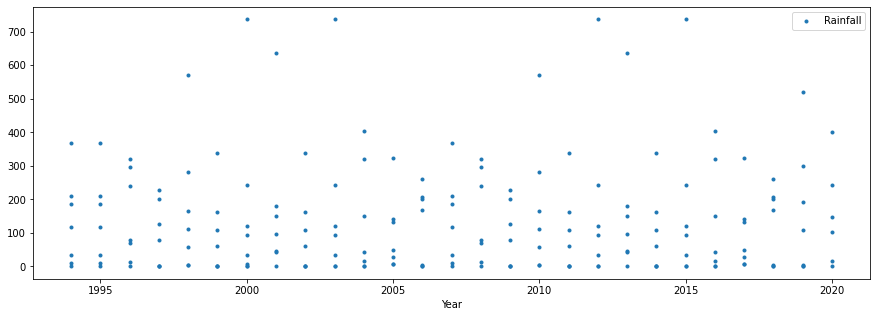

In [5]:
df.plot(x='Year',y='Rainfall',style='.', figsize=(15,5))

<Axes: xlabel='Year'>

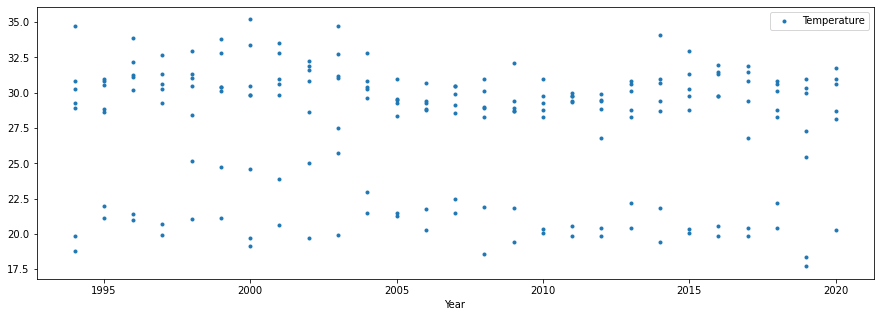

In [6]:
df.plot(x='Year',y='Temperature',style='.', figsize=(15,5))

In [7]:
train = df.loc[df['Year'] <= 2016]
test = df.loc[df['Year'] >= 2017]
train=train[train['Station']=='Chuadanga']
test=test[test['Station']=='Chuadanga']

In [8]:
train.size

810

In [9]:
X_train=train.drop(['Station', 'Temperature', 'Rainfall'], axis=1)
Y_train=train['Rainfall']

In [10]:
X_test=test.drop(['Station','Temperature', 'Rainfall'],axis=1)
Y_test=test['Rainfall']

In [11]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

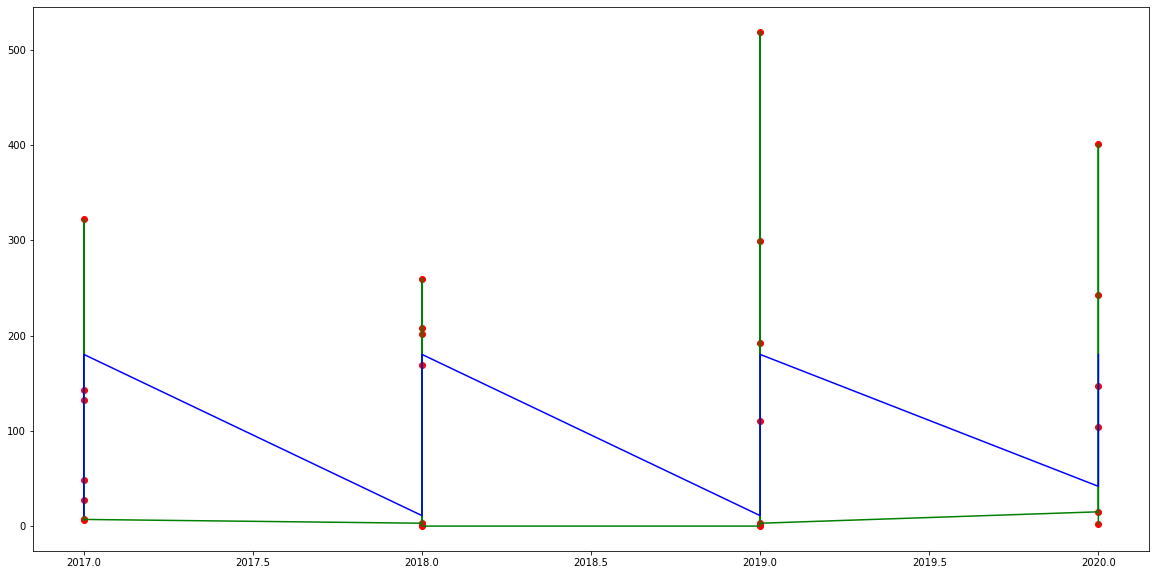

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Year'],Y_test,color='red')
plt.plot(X_test['Year'],Y_test,color='green')
plt.plot(X_test['Year'],Y_pred,color='blue')

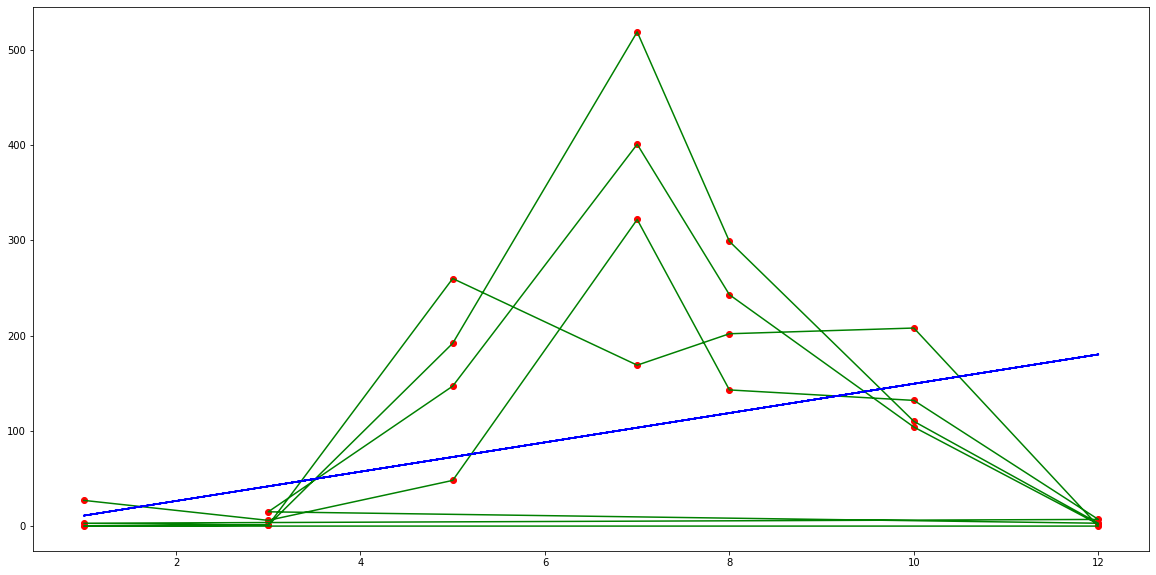

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Month'],Y_test,color='red')
plt.plot(X_test['Month'],Y_test,color='green')
plt.plot(X_test['Month'],Y_pred,color='blue')

In [14]:
Y_exp_pred = regressor.predict([[2040, 2]])
Y_exp_pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([25.91282895])

In [15]:
Y_train2=train['Temperature']

In [16]:
Y_test2=test['Temperature']

In [17]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train2)
Y_pred2 = regressor.predict(X_test)

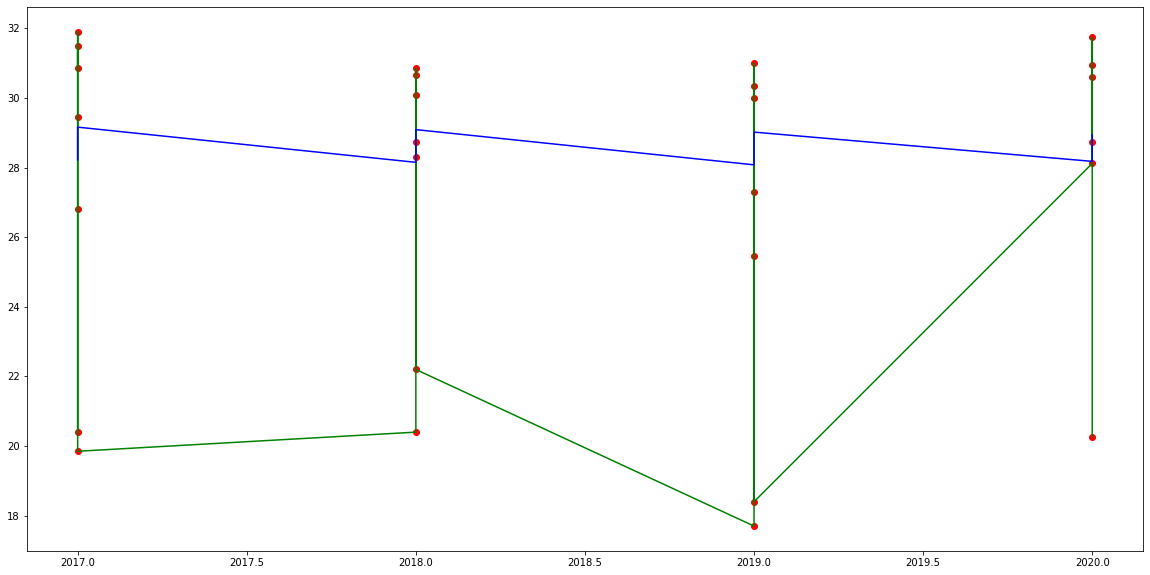

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Year'],Y_test2,color='red')
plt.plot(X_test['Year'],Y_test2,color='green')
plt.plot(X_test['Year'],Y_pred2,color='blue')

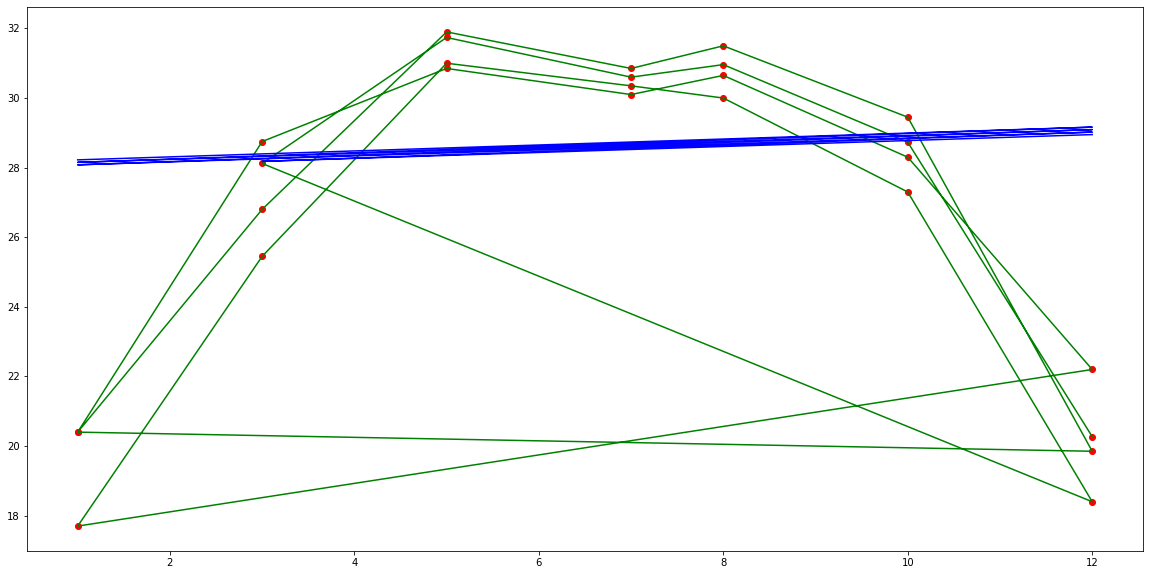

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Month'],Y_test2,color='red')
plt.plot(X_test['Month'],Y_test2,color='green')
plt.plot(X_test['Month'],Y_pred2,color='blue')

In [21]:
Y_exp_pred2 = regressor.predict([[2040, 2]])
Y_exp_pred2

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([26.66659651])

In [22]:
drought = (Y_test / Y_exp_pred) * ((Y_test2 / Y_exp_pred2)**0.5)
print(drought)

276     0.911340
278     0.232124
280     2.025993
282    13.365488
283     5.997810
285     5.353255
287     0.233066
288     0.101260
290     0.040070
292    10.792009
294     6.929012
295     8.357338
297     8.269094
299     0.000000
300     0.000000
302     0.037700
304     7.988835
306    21.367223
307    12.238641
309     4.295121
311     0.096168
314     0.594429
316     6.189024
318    16.577020
319    10.104344
321     4.165839
323     0.067291
dtype: float64
